In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\JORGE\AppData\Local\Temp\ipykernel_24700\1289074581.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
#Importación de la Big Data
df = pd.read_excel("miArchivo_v4.xlsx",sheet_name="Sheet1")

#Extracción de Datos
y1 = df["As (cm^2)"]
y2 = df["d_opt (cm)"]
x = df[["q","b (mm)","fc (MPa)","Mu (Kn.m)"]]

#Separación de la BigData en "Training" y "Testing"
xtrain,xtest,ytrain1,ytest1,ytrain2,ytest2 = train_test_split(x,y1,y2,test_size=0.2,random_state=5)
ytrain2,ytest2 

(26871    131.149325
 22625     91.143616
 20874     98.797325
 35938     72.519690
 2788      36.306671
             ...    
 5520     104.615265
 35814     39.630358
 20463     48.198485
 18638     55.211857
 35683    101.993265
 Name: d_opt (cm), Length: 35251, dtype: float64,
 42771    106.524520
 31419     89.384524
 12038     62.254782
 27858     53.352462
 13710    107.559323
             ...    
 8348     112.376312
 28639     93.650905
 34164    145.529497
 38905     97.491781
 5587      60.966797
 Name: d_opt (cm), Length: 8813, dtype: float64)

In [5]:
#Definición de la función "RMSE"
def rmse(y_true,y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true-y_pred)))

#Creación de Modelo de ANN para As
model_As = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Compilar modelo
model_As.compile(optimizer='adam',
              loss = rmse)

#Entrenar el modelo
model_As.fit(xtrain,ytrain1,epochs=20,verbose=True)



Epoch 1/20

1102/1102 [==============================] - 5s 3ms/step - loss: 3.1073
Epoch 2/20
1102/1102 [==============================] - 3s 2ms/step - loss: 2.0195
Epoch 3/20
1102/1102 [==============================] - 3s 3ms/step - loss: 1.8346
Epoch 4/20
1102/1102 [==============================] - 3s 2ms/step - loss: 1.7647
Epoch 5/20
1102/1102 [==============================] - 3s 2ms/step - loss: 1.6963
Epoch 6/20
1102/1102 [==============================] - 3s 3ms/step - loss: 1.6061
Epoch 7/20
1102/1102 [==============================] - 3s 2ms/step - loss: 1.6476
Epoch 8/20
1102/1102 [==============================] - 6s 6ms/step - loss: 1.5675
Epoch 9/20
1102/1102 [==============================] - 6s 6ms/step - loss: 1.5441
Epoch 10/20
1102/1102 [==============================] - 3s 3ms/step - loss: 1.5159
Epoch 11/20
1102/1102 [==============================] - 3s 2ms/step - loss: 1.4838
Epoch 12/20
1102/1102 [==============================] - 3s 3ms/step - loss: 1.446

In [ ]:
#Creación de Modelo de ANN para d
model_d = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Compilar modelo
model_d.compile(optimizer='adam',
              loss = rmse)

#Entrenar el modelo
model_d.fit(xtrain,ytrain2,epochs=25,verbose=True)

PLOTEO DEL MODELO DE "As (cm^2)"

1102/1102 [==============================] - 2s 2ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

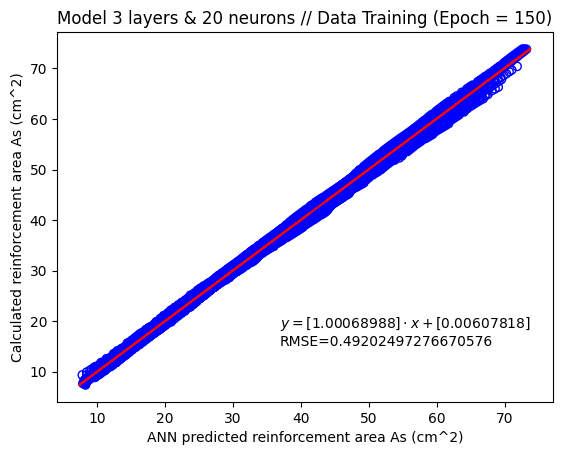

In [7]:
#Ploteando resultados
y_pred = model_As.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain1,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain1, y_pred, 1)

plt.scatter(y_pred,ytrain1,facecolors = 'none',edgecolors='b')
plt.plot(ytrain1, m*ytrain1 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

276/276 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

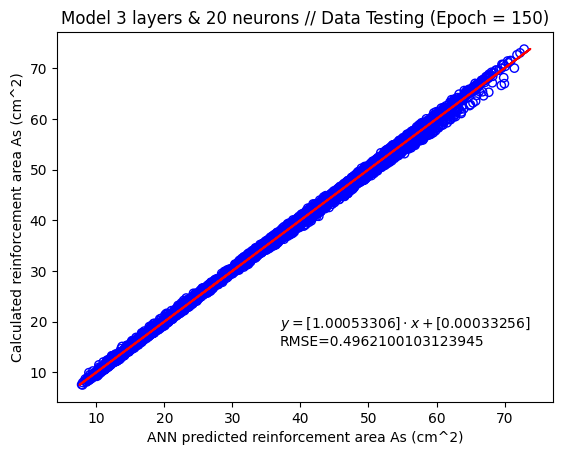

In [8]:
y_pred = model_As.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest1,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest1, y_pred, 1)

plt.scatter(y_pred,ytest1,facecolors = 'none',edgecolors='b')
plt.plot(ytest1, m*ytest1 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

57/57 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Validating (Epoch = 50)')

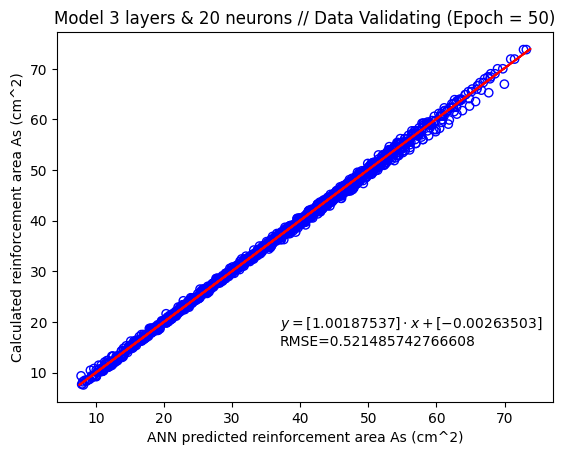

In [9]:
#Extracción de datos del paper
datos_paper = pd.read_excel("miArchivo_v5.xlsx",sheet_name="Sheet1")
x_paper = datos_paper[["q","b (mm)","fc (MPa)","Mu (Kn.m)"]]
y_paper = datos_paper["As (cm^2)"]

#Evaluación en el Modelo entrenado por ANN
y_pred = model_As.predict(x_paper)

RMSE = sqrt(mean_squared_error(y_paper,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(y_paper, y_pred, 1)

plt.scatter(y_pred,y_paper,facecolors = 'none',edgecolors='b')
plt.plot(y_paper, m*y_paper + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Validating (Epoch = 50)')

PLOTEO DEL MODELO DE "d (cm)"

1102/1102 [==============================] - 2s 2ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

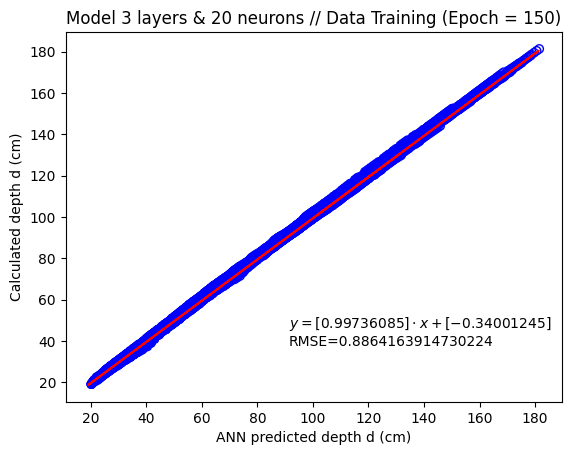

In [10]:
#Ploteando resultados
y_pred = model_d.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain2,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain2, y_pred, 1)

plt.scatter(y_pred,ytrain2,facecolors = 'none',edgecolors='b')
plt.plot(ytrain2, m*ytrain2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

276/276 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

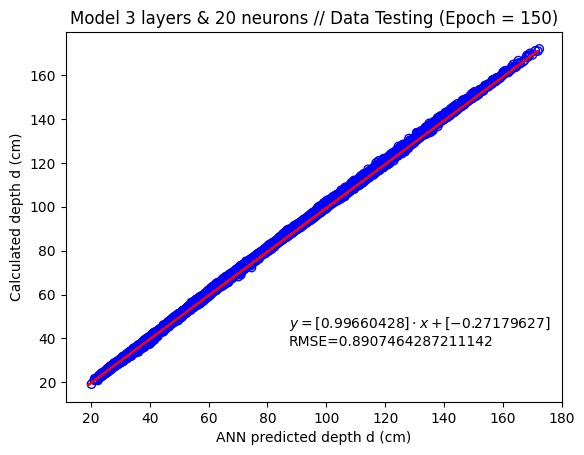

In [11]:
y_pred = model_d.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest2,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest2, y_pred, 1)

plt.scatter(y_pred,ytest2,facecolors = 'none',edgecolors='b')
plt.plot(ytest2, m*ytest2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

57/57 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Validating (Epoch = 50)')

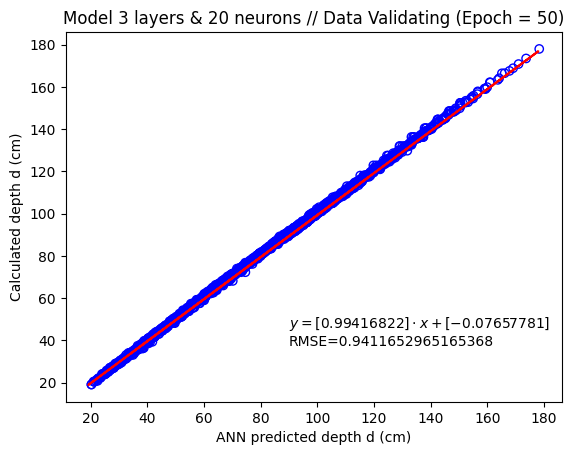

In [12]:
#Extracción de datos del paper
datos_paper = pd.read_excel("miArchivo_v5.xlsx",sheet_name="Sheet1")
x_paper = datos_paper[["q","b (mm)","fc (MPa)","Mu (Kn.m)"]]
y_paper = datos_paper["d_opt (cm)"]

#Evaluación en el Modelo entrenado por ANN
y_pred = model_d.predict(x_paper)

RMSE = sqrt(mean_squared_error(y_paper,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(y_paper, y_pred, 1)

plt.scatter(y_pred,y_paper,facecolors = 'none',edgecolors='b')
plt.plot(y_paper, m*y_paper + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Validating (Epoch = 50)')

In [13]:
#Datos de ETABS
q = [20]
b = [300]
fc = [21]
Mu = [400]

#Almacenamiento de datos del ETABS
data_Etabs = pd.DataFrame()
data_Etabs['q'] = q
data_Etabs['b (mm)'] = b
data_Etabs['fc (MPa)'] = fc
data_Etabs['Mu (Kn.m)'] = Mu

#Evaluación en el Modelo entrenado por ANN
y_As = model_As.predict(data_Etabs)
y_d = model_d.predict(data_Etabs)

imprimir = f"El Área de Acero (As) es {y_As} cm^2 y el peralte efectivo (d) es {y_d} cm"
print(imprimir)

1/1 [==============================] - 0s 25ms/step
El Área de Acero (As) es [[23.023718]] cm^2 y el peralte efectivo (d) es [[56.530525]] cm
